# Application du Q-learning sur le monde du Wumpus :

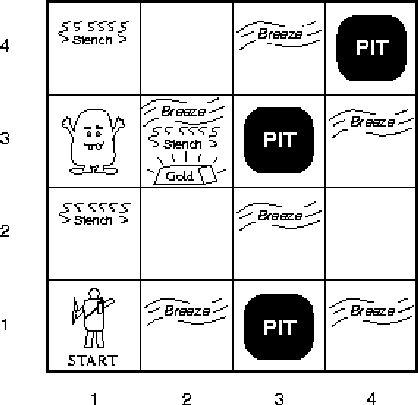

**Numérotation des cases:**

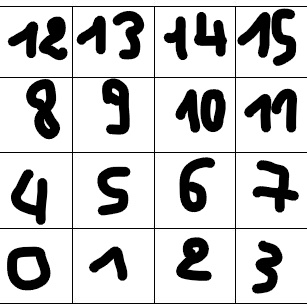

In [ ]:
import numpy as np

# initialisation de la matrice de recompences selon le monde du wumpus
# tel que :
# le déplacement de l'agent vers une case sûre rapporte: +10
# le déplacement de l'agent vers une case contenant un puit rapporte: -10 
# le déplacement de l'agent vers la case ou se trouve le wumpus rapporte: -1000
# le déplacement de l'agent vers une case non adjacente ou ne change pas d'emplacement rapporte: 0

Matrix_reward = np.array([[0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [10, 0, -10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 10, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [0, 0, -10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0],
                          [10, 0, 0, 0, 0, 10, 0, 0, -1000, 0, 0, 0, 0, 0, 0, 0],
                          [0, 10, 0, 0, 10, 0, 10, 0, 0, 1000, 0, 0, 0, 0, 0, 0],
                          [0, 0, -10, 0, 0, 10, 0, 10, 0, 0, -10, 0, 0, 0, 0, 0],
                          [0, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0],
                          [0, 0, 0, 0, 10, 0, 0, 0, 0, 1000, 0, 0, 10, 0, 0, 0],
                          [0, 0, 0, 0, 0, 10, 0, 0, -1000, 0, -10, 0, 0, 10, 0, 0],
                          [0, 0, 0, 0, 0, 0, 10, 0, 0, 1000, 0, 10, 0, 0, 10, 0],
                          [0, 0, 0, 0, 0, 0, 0, 10, 0, 0, -10, 0, 0, 0, 0, -10],
                          [0, 0, 0, 0, 0, 0, 0, 0, -1000, 0, 0, 0, 0, 10, 0, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 1000, 0, 0, 10, 0, 10, 0],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -10, 0, 0, 10, 0, -10],
                          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 10, 0]
                         ])


# initialisation de la matrice de Q :
Matrix_q = np.zeros((16, 16))

# initialisation du parametre d'apprentissage
gamma = 0.8

print(Matrix_reward.shape)
print(Matrix_q.shape)

(16, 16)
(16, 16)


In [ ]:
import random

# initialisation du nombre d'episodes
nb_episode = 20

for i in range(nb_episode):
    # initialiser l'etat de départ (la case 0)
    etat = 0
    but = False
    # l'episode s'arrete quand le but est atteint
    while but != True :
        action_possible =[]
        # selectionner tout les actions possibles à effecter par l'etat couranr
        for j in range(16):
            if Matrix_reward[etat, j] != 0:
                action_possible.append(j)
        # choisir un etat au hasard parmi les etats possibles
        a = random.choice(action_possible)
        
        etat_suiv = a
        # mise a jour de la case de la matrice Q
        Matrix_q[etat, a] = Matrix_reward[etat, a] + gamma*(np.max(Matrix_q[etat_suiv, :]))
        etat = etat_suiv
        # verification si l'etat but est atteint
        if( etat == 9):
            but = True


In [ ]:
# affichage de la matrice de Q finale après entrainement:
import pandas as pd
df = pd.DataFrame(Matrix_q)
df.style

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.000000,658.000000,0.000000,0.000000,658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,536.400000,0.000000,516.400000,0.000000,0.000000,810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,658.000000,0.000000,439.120000,0.000000,0.000000,658.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,516.400000,0.000000,0.000000,0.000000,0.000000,536.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,536.400000,0.000000,0.000000,0.000000,0.000000,810.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,658.000000,0.000000,0.000000,658.000000,0.000000,658.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,516.400000,0.000000,0.000000,810.000000,0.000000,536.400000,0.000000,0.000000,790.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,439.120000,0.000000,0.000000,658.000000,0.000000,0.000000,0.000000,0.000000,642.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,658.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,41.611392,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
